In [1]:
# Render our plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

%xmode Verbose


plt.style.use('ggplot') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

Exception reporting mode: Verbose


# 1.1 Reading data from a csv file

You can read data from a CSV file using the `read_csv` function. By default, it assumes that the fields are comma-separated.

We're going to be looking some cyclist data from Montréal. Here's the [original page](http://donnees.ville.montreal.qc.ca/dataset/velos-comptage) (in French), but it's already included in this repository. We're using the data from 2012.

This dataset is a list of how many people were on 7 different bike paths in Montreal, each day.

In [2]:
broken_df = pd.read_csv('bikes.csv', encoding='latin')

In [3]:
# Look at the first 3 rows
broken_df['Date']
broken_df.head()

,Date,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,BrÃ©beuf,Parc,PierDup,CSC (CÃ´te Sainte-Catherine),Pont_Jacques_Cartier
0,01/01/2012,00:00,16,35,51,38,5.0,26,10,0,27.0
1,02/01/2012,00:00,43,83,153,68,11.0,53,6,1,21.0
2,03/01/2012,00:00,58,135,248,104,2.0,89,3,2,15.0
3,04/01/2012,00:00,61,144,318,116,2.0,111,8,1,19.0
4,05/01/2012,00:00,95,197,330,124,6.0,97,13,2,16.0


You'll notice that this is totally broken! `read_csv` has a bunch of options that will let us fix that, though. Here we'll

* change the column separator to a `;`
* Set the encoding to `'latin1'` (the default is `'utf8'`)
* Parse the dates in the 'Date' column
* Tell it that our dates have the day first instead of the month first
* Set the index to be the 'Date' column

In [4]:
fixed_df = pd.read_csv('bikes.csv', parse_dates=['Date'], dayfirst=True, index_col='Date')
fixed_df[:3]
# Why is it 'fixed'? In below example, the Date is the index. In the previous set, the index was just a number

,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
Date,,,,,,,,,,
2012-01-01,00:00,16,35,51,38,5.0,26,10,0,27.0
2012-01-02,00:00,43,83,153,68,11.0,53,6,1,21.0
2012-01-03,00:00,58,135,248,104,2.0,89,3,2,15.0


# 1.2 Selecting a column

When you read a CSV, you get a kind of object called a `DataFrame`, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary.

Here's an example:

In [5]:
fixed_df.columns

Index(['Unnamed: 1', 'Rachel / Papineau', 'Berri1', 'Maisonneuve_2',
       'Maisonneuve_1', 'Brébeuf', 'Parc', 'PierDup',
       'CSC (Côte Sainte-Catherine)', 'Pont_Jacques_Cartier'],
      dtype='object')

In [6]:
fixed_df['PierDup']

Date
2012-01-01     10
2012-01-02      6
2012-01-03      3
2012-01-04      8
2012-01-05     13
2012-01-06      4
2012-01-07      6
2012-01-08     11
2012-01-09     12
2012-01-10     18
2012-01-11     12
2012-01-12      9
2012-01-13      2
2012-01-14      0
2012-01-15      0
2012-01-16      1
2012-01-17      0
2012-01-18      3
2012-01-19      3
2012-01-20      1
2012-01-21      1
2012-01-22      5
2012-01-23      6
2012-01-24      4
2012-01-25      4
2012-01-26      0
2012-01-27      0
2012-01-28      9
2012-01-29      7
2012-01-30      2
             ... 
2012-12-02     35
2012-12-03    116
2012-12-04     97
2012-12-05     40
2012-12-06     76
2012-12-07     65
2012-12-08     26
2012-12-09     52
2012-12-10      5
2012-12-11     20
2012-12-12     14
2012-12-13     26
2012-12-14     41
2012-12-15     10
2012-12-16     10
2012-12-17     11
2012-12-18      9
2012-12-19      1
2012-12-20      9
2012-12-21      6
2012-12-22      1
2012-12-23      4
2012-12-24      1
2012-12-25     17
2012-

# 1.3 Plotting a column

Just add `.plot()` to the end! How could it be easier? =)

We can see that, unsurprisingly, not many people are biking in January, February, and March, 

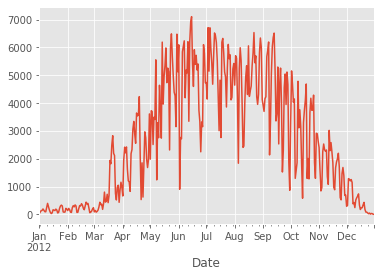

In [7]:
fixed_df['Berri1'].plot()

We can also plot all the columns just as easily. We'll make it a little bigger, too.
You can see that it's more squished together, but all the bike paths behave basically the same -- if it's a bad day for cyclists, it's a bad day everywhere.

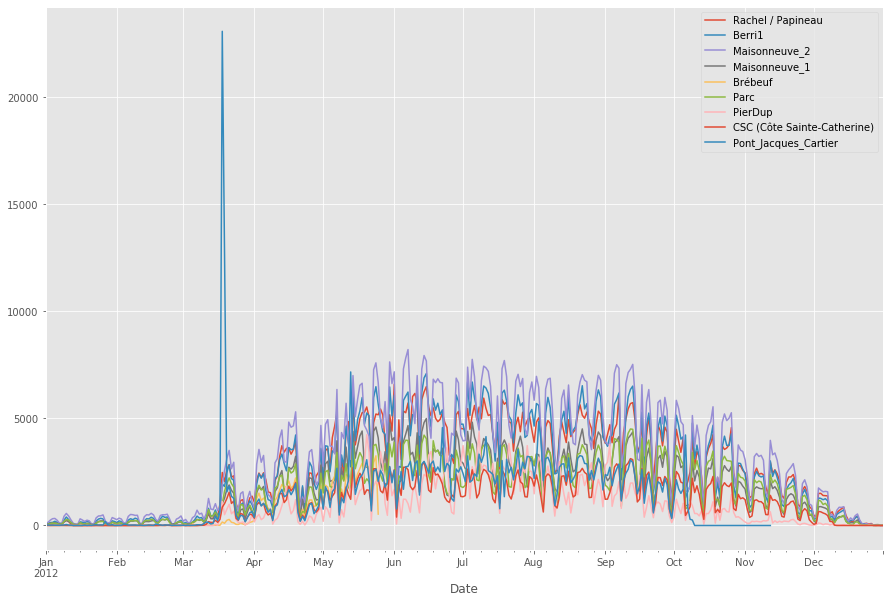

In [8]:
fixed_df.plot(figsize=(15, 10))

# 1.4 Putting all that together

Here's the code we needed to write do draw that graph, all together:

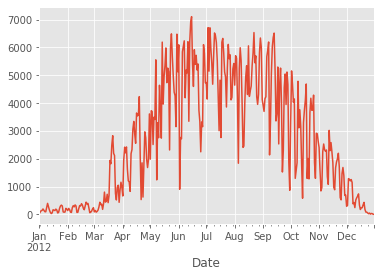

In [9]:
df = pd.read_csv('bikes.csv', sep=',', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
df['Berri1'].plot()

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  

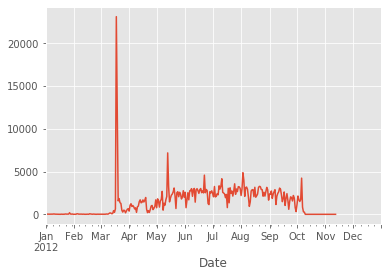

In [10]:
df['Pont_Jacques_Cartier'].plot()